# Plotting
Author: Javier Duarte, Thong Nguyen

In [0]:
!fusermount -u drive

fusermount: failed to unmount /content/drive: No such file or directory


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Bari_Lectures'

Mounted at /content/gdrive


## Plotting in `matplotlib`
Here we do the plotting in `matplotlib` with `uproot`

In [0]:
!pip install uproot

  Using cached https://files.pythonhosted.org/packages/43/80/e10d5436c629fe758d17a41277b763be5f0714554e007ab3429beb8e6bc5/uproot-3.4.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/f8/f5a53c78ef24e5e142c94ef63ce6cf8729893094518cd16e879fc9a81354/awkward-0.8.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/75/73/e1132d45d527e587c94b1de2117fbbe6323fea73b6b41efe45e6d0bc00d8/uproot_methods-0.4.2-py2.py3-none-any.whl


In [0]:
import uproot
import numpy as np
import pandas as pd
import h5py

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}
params = {}

filename['bkg'] = base_dir+'/ntuple_bkg_ZZ4mu.root'
filename['VV'] = base_dir+'/ntuple_qqH_ZZ4mu.root'

upfile['bkg'] = uproot.open(filename['bkg'])
params['bkg'] = upfile['bkg'][treename].arrays() # dictionary of NumPy arrays
upfile['VV'] = uproot.open(filename['VV'])
params['VV'] = upfile['VV'][treename].arrays() 

In [0]:
df = {}
VARS = ['f_mass4l', 'f_massjj']
df['bkg'] = pd.DataFrame(params['bkg'],columns=VARS)
df['VV'] = pd.DataFrame(params['VV'],columns=VARS)

(0, 2000)

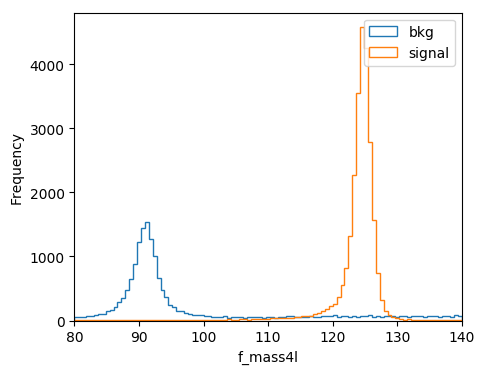

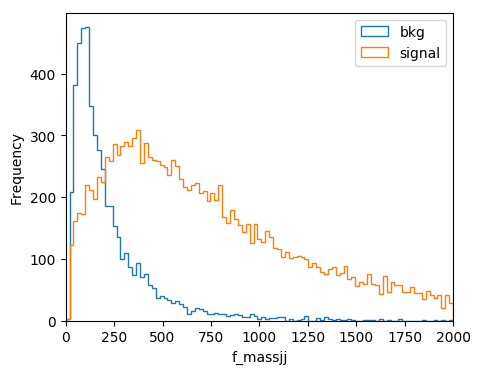

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins, label='signal',histtype='step')
plt.legend(loc='upper right')
plt.xlim(80,140)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins, label='signal',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,2000)